In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/')
os.getcwd()

'/content/gdrive'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/'
files = os.listdir(path)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 13,502,465
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/VGG16SVM- 110123/MyData/Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=5,
    image_size=(224,224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/VGG16SVM- 110123/MyData/Validation',
    labels='inferred',
    label_mode = 'int',
    batch_size=5,
    image_size=(224,224)
)

Found 133 files belonging to 2 classes.
Found 72 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_ds,epochs=50,validation_data=validation_ds)

Epoch 1/50
27/27 [==============================] - 63s 2s/step - loss: 0.6940 - accuracy: 0.6015 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 2/50
27/27 [==============================] - 2s 70ms/step - loss: 0.6095 - accuracy: 0.7068 - val_loss: 0.7619 - val_accuracy: 0.5556
Epoch 3/50
27/27 [==============================] - 2s 70ms/step - loss: 0.5441 - accuracy: 0.7368 - val_loss: 0.6982 - val_accuracy: 0.5833
Epoch 4/50
27/27 [==============================] - 2s 70ms/step - loss: 0.4685 - accuracy: 0.7970 - val_loss: 0.7590 - val_accuracy: 0.5694
Epoch 5/50
27/27 [==============================] - 2s 71ms/step - loss: 0.4134 - accuracy: 0.8271 - val_loss: 0.6243 - val_accuracy: 0.6111
Epoch 6/50
27/27 [==============================] - 2s 71ms/step - loss: 0.3380 - accuracy: 0.9173 - val_loss: 0.6257 - val_accuracy: 0.6111
Epoch 7/50
27/27 [==============================] - 2s 71ms/step - loss: 0.2543 - accuracy: 0.9549 - val_loss: 0.6342 - val_accuracy: 0.6528
Epoch 8/50
27/

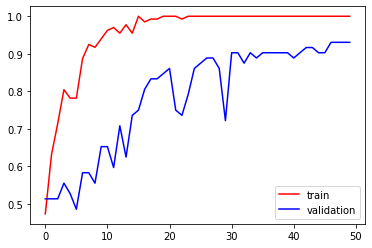

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

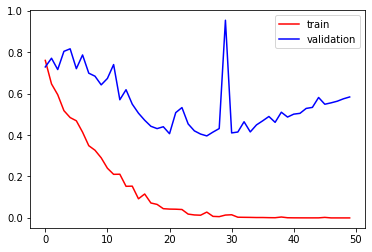

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/VGG16SVM- 110123/VGG16FT1.hdf5')